In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

In [10]:
dfNorm = pd.read_csv("data/dataL3/resultTestNormFin.csv", delimiter=";")
dfUni = pd.read_csv("data/dataL3/resultTestUniFin.csv", delimiter=";")

In [11]:

def extractFromColumnByN(df, columnName, ns):
    minC = []
    maxC = []
    meanC = []
    medianC = []
    stdC = []
    varC = []
    for n in ns:
        column = df.loc[df.n == n][columnName]
        minC.append(column.min())
        maxC.append(column.max())
        meanC.append(column.mean())
        medianC.append(column.median())
        stdC.append(column.std())
        varC.append(column.var())
        
    return minC, maxC, meanC, medianC, stdC, varC

In [12]:
def chebyshev(data, percent):
        EX = sum([abs(dat) for dat in data]) / (len(data)- 1)
        VarX = sum([(dat - EX) ** 2 for dat in data]) / (len(data) - 1)
        return math.sqrt(VarX/ percent)

def markov(data, percent):
        EX = sum([abs(dat) for dat in data]) / (len(data)- 1)
        return EX / percent

def getUpperAndLower(data, percent):
    sortedData = sorted(data)
    return sortedData[int(percent * len(data))], sortedData[-(int(percent * len(data)) + 1)]

In [13]:
def plotWithAll(cheby, markov, mean, median, min, max, real, ax, ns, title):
    lowerReal = list(map(lambda x: x[1], real))
    upperReal = list(map(lambda x: x[0], real))
    chebyLow = [mean[i] - cheby[i] for i in range(len(ns))]
    chebyHigh = [mean[i] + cheby[i] for i in range(len(ns))]
    markovLow = [mean[i] - markov[i] for i in range(len(ns))]
    markovHigh = [mean[i] + markov[i] for i in range(len(ns))]
    # ax.plot(ns, lowerReal, label = "lower real")
    # ax.plot(ns, upperReal, label = "upper real")
    ax.plot(ns, chebyLow, label = "lower chebyshev")
    ax.plot(ns, chebyHigh, label = "upper chebyshev")
    # ax.plot(ns, markovLow, label = "lower markov")
    # ax.plot(ns, markovHigh, label = "upper markov")
    ax.plot(ns, mean, label="Real")
    ax.plot(ns, min, label="Min")
    ax.plot(ns, median, label="Median")
    ax.plot(ns, max, label="Max")
    ax.legend()
    ax.set_title(title)

In [14]:
def plotConcentration(df, type, plotTitle, ax):
    percent = 0.2
    ns = dfNorm.n.unique()
    minRes, maxRes, meanRes, medianRes, stdRes, varRes = extractFromColumnByN(df, type, ns)
    cheby = [chebyshev(df.loc[df.n == n].rounds, percent) for n in ns]
    mrkv = [markov(df.loc[df.n == n].rounds, percent) for n in ns]
    real = [getUpperAndLower(df.loc[df.n == n].rounds, percent) for n in ns]

    plotWithAll(cheby, mrkv, meanRes, medianRes, minRes, maxRes, real, ax, ns, plotTitle)

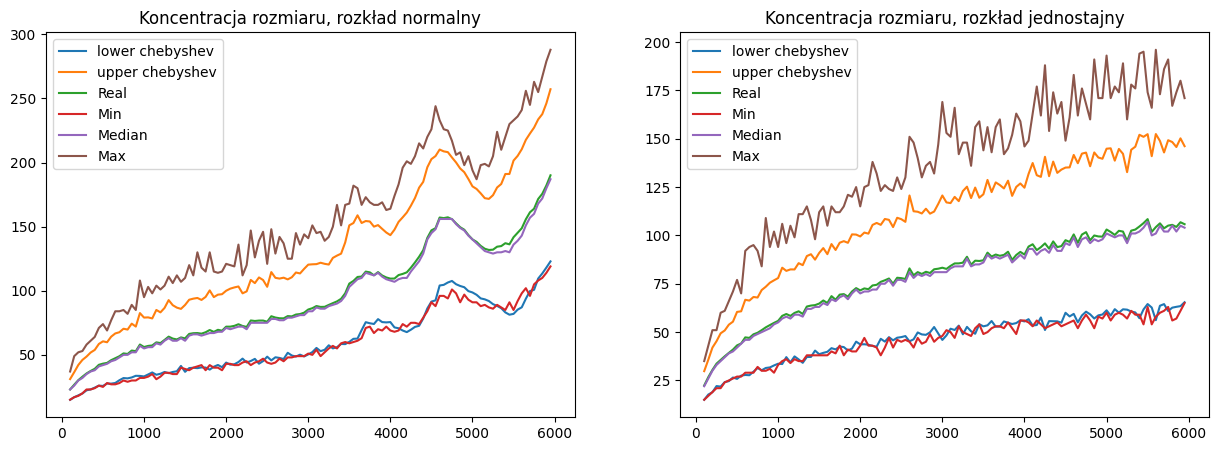

In [7]:
plt.close()
fig, axs = plt.subplots(1, 2,  figsize=(15, 5))
plotConcentration(dfNorm, "rounds", "Koncentracja rozmiaru, rozkład normalny", axs[0])  
plotConcentration(dfUni, "rounds", "Koncentracja rozmiaru, rozkład jednostajny", axs[1])  


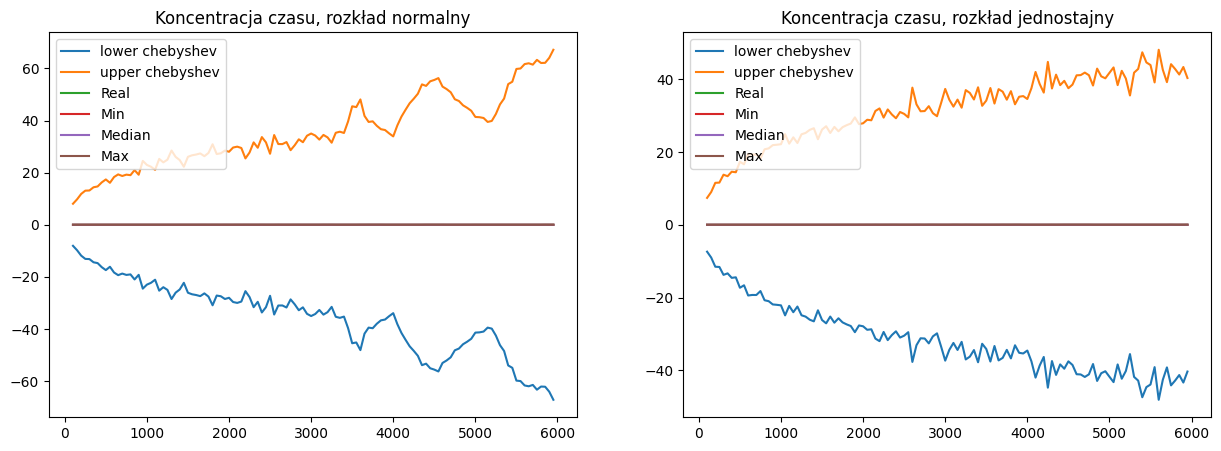

In [8]:
plt.close()
fig, axs = plt.subplots(1, 2,  figsize=(15, 5))
plotConcentration(dfNorm, "time", "Koncentracja czasu, rozkład normalny", axs[0])  
plotConcentration(dfUni, "time", "Koncentracja czasu, rozkład jednostajny", axs[1])  

In [48]:
def plotWithDepth(df, dsitro):
    ns = df.n.unique()
    fig, axs = plt.subplots(len(ns)//2, 2, figsize=(15, 5 * len(ns)//2))

    for i, n in enumerate(ns):
        axs[(i) % (len(ns)//2)][i % 2].scatter(df.loc[df.n == n].depth, df.loc[df.n == n].rounds)
        axs[(i) % (len(ns)//2)][i % 2].set_title(f"Wyniki pomiarów w zależności od głębkości drzewa - {dsitro}")

In [4]:
dfNormDepth = pd.read_csv("data/dataL3/resultTestNormFin2Depth2.csv", delimiter=";")
dfUniDepth = pd.read_csv("data/dataL3/resultTestUniFin2Depth2.csv", delimiter=";")

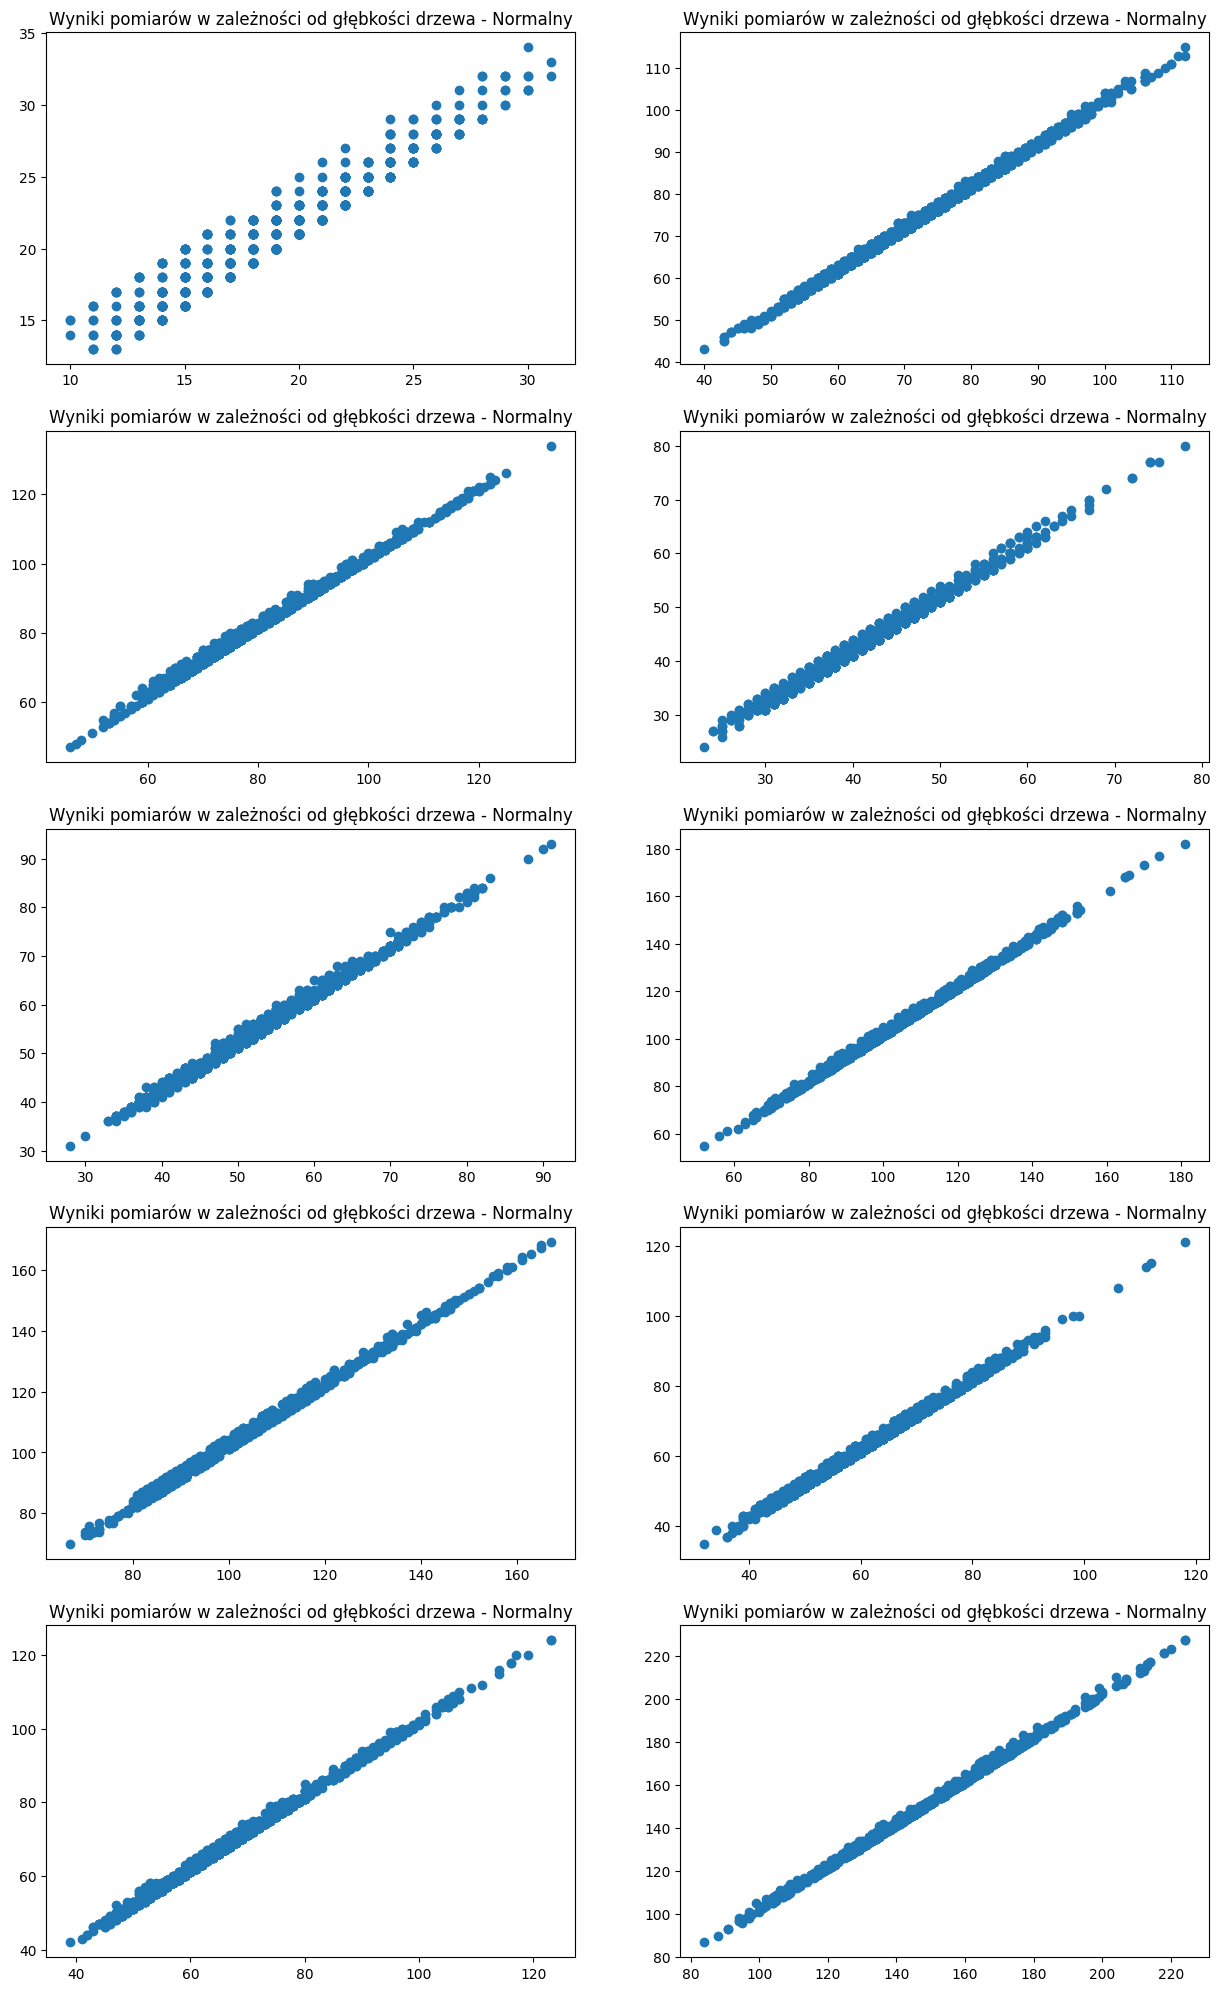

In [49]:
plotWithDepth(dfNormDepth, "Normalny")

In [15]:
%matplotlib ipympl

In [16]:
def print3DHist(dataFrame, distro):
    bin_edges = np.linspace(min(dataFrame['rounds']), max(dataFrame['rounds']), 20)
    
    # Prepare grid for x (rounds), y (n values)
    X, Y = np.meshgrid(bin_edges, np.unique(dataFrame['n']))
    
    # Initialize Z grid (frequencies) with zeros
    Z = np.zeros_like(X)
    
    # Calculate frequency for each unique 'n'
    for i, n in enumerate(np.unique(dataFrame['n'])):
        hist, _ = np.histogram(dataFrame[dataFrame['n'] == n]['rounds'], bins=bin_edges)
        Z[i, :len(hist)] = hist
    
    # Create a 3D plot
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(121, projection='3d')
    
    ax.set_xlabel('Liczba rund')
    ax.set_ylabel('N')
    ax.set_zlabel('Liczba obserwacji w przedziale')
    ax.set_title(f'Rozkłady gęstości czasu przesułu w zależności od N = {distro}')
    # Create the surface plot
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax2 = fig.add_subplot(122)
    plotConcentration(dataFrame, "rounds", f"Koncentracja rozmiaru, rozkład {distro}", ax2)  
    plt.show()
    



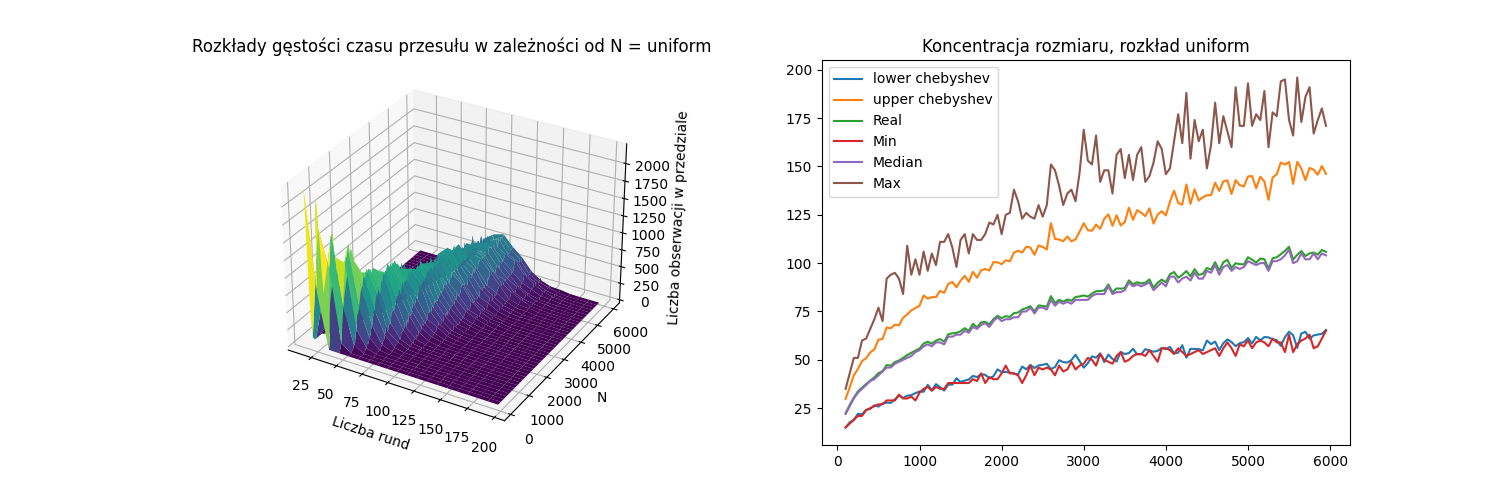

In [21]:
plt.close()
print3DHist(dfUni, 'uniform')

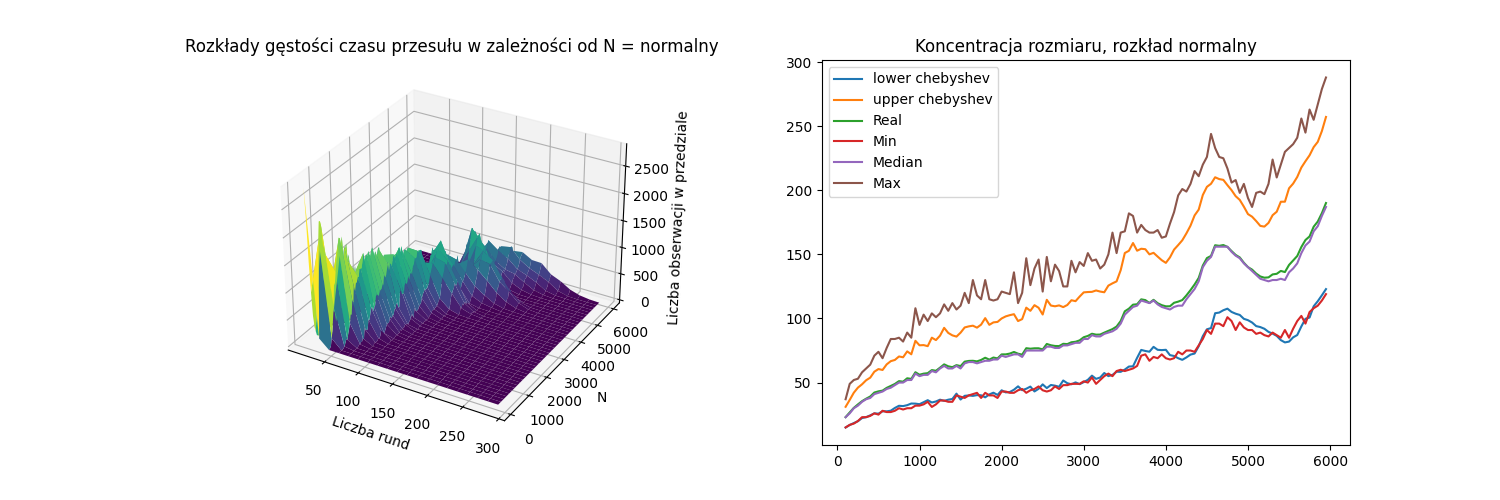

In [18]:
plt.close()
print3DHist(dfNorm, 'normalny')

In [58]:
dfNormApprox = pd.read_csv("data/dataL3/resultTestNormFin2.csv", delimiter=";")
dfUniApprox = pd.read_csv("data/dataL3/resultTestUniFin2.csv", delimiter=";")

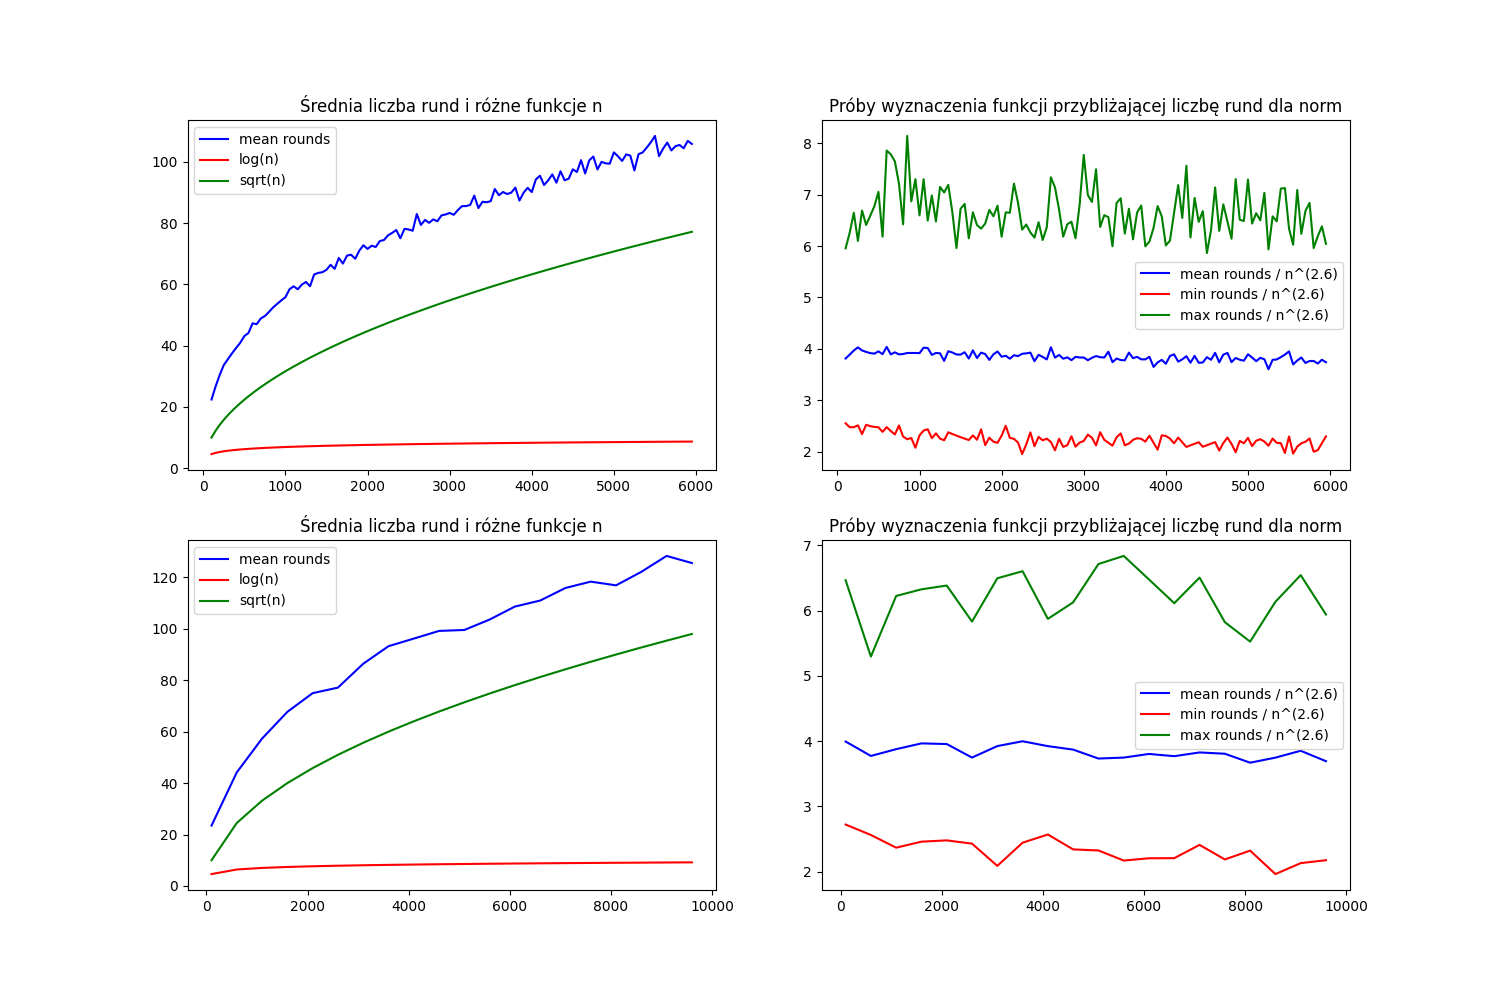

In [95]:
Ns = dfUni.n.unique()

minRes, maxRes, meanRes, _, _, _ = extractFromColumnByN(dfUni, "rounds", Ns)
plt.close()

factor = 2.6
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(Ns, meanRes, color = "blue", label= "mean rounds")
axs[0][0].plot(Ns, [math.log(n) for n in Ns], color = "red", label= "log(n)")
axs[0][0].plot(Ns, [math.sqrt(n) for n in Ns], color = "green", label= "sqrt(n)")
axs[0][0].legend()
axs[0][0].set_title("Średnia liczba rund i różne funkcje n")
sqrtN = [n**(1/factor) for n in Ns]
axs[0][1].plot(Ns, [x / y for x, y in zip(meanRes, sqrtN)] , color = "blue", label= f"mean rounds / n^({factor})")
axs[0][1].plot(Ns, [x / y for x, y in zip(minRes, sqrtN)] , color = "red", label= f"min rounds / n^({factor})")
axs[0][1].plot(Ns, [x / y for x, y in zip(maxRes, sqrtN)] , color = "green", label= f"max rounds / n^({factor})")
axs[0][1].set_title("Próby wyznaczenia funkcji przybliżającej liczbę rund dla norm")
axs[0][1].legend()

Ns = dfUniApprox.n.unique()
minRes, maxRes, meanRes, _, _, _ = extractFromColumnByN(dfUniApprox, "rounds", Ns)

axs[1][0].plot(Ns, meanRes, color = "blue", label= "mean rounds")
axs[1][0].plot(Ns, [math.log(n) for n in Ns], color = "red", label= "log(n)")
axs[1][0].plot(Ns, [math.sqrt(n) for n in Ns], color = "green", label= "sqrt(n)")
axs[1][0].legend()
axs[1][0].set_title("Średnia liczba rund i różne funkcje n")

sqrtN = [n**(1/factor) for n in Ns]
axs[1][1].plot(Ns, [x / y for x, y in zip(meanRes, sqrtN)] , color = "blue", label= f"mean rounds / n^({factor})")
axs[1][1].plot(Ns, [x / y for x, y in zip(minRes, sqrtN)] , color = "red", label= f"min rounds / n^({factor})")
axs[1][1].plot(Ns, [x / y for x, y in zip(maxRes, sqrtN)] , color = "green", label= f"max rounds / n^({factor})")
axs[1][1].set_title("Próby wyznaczenia funkcji przybliżającej liczbę rund dla norm")
axs[1][1].legend()


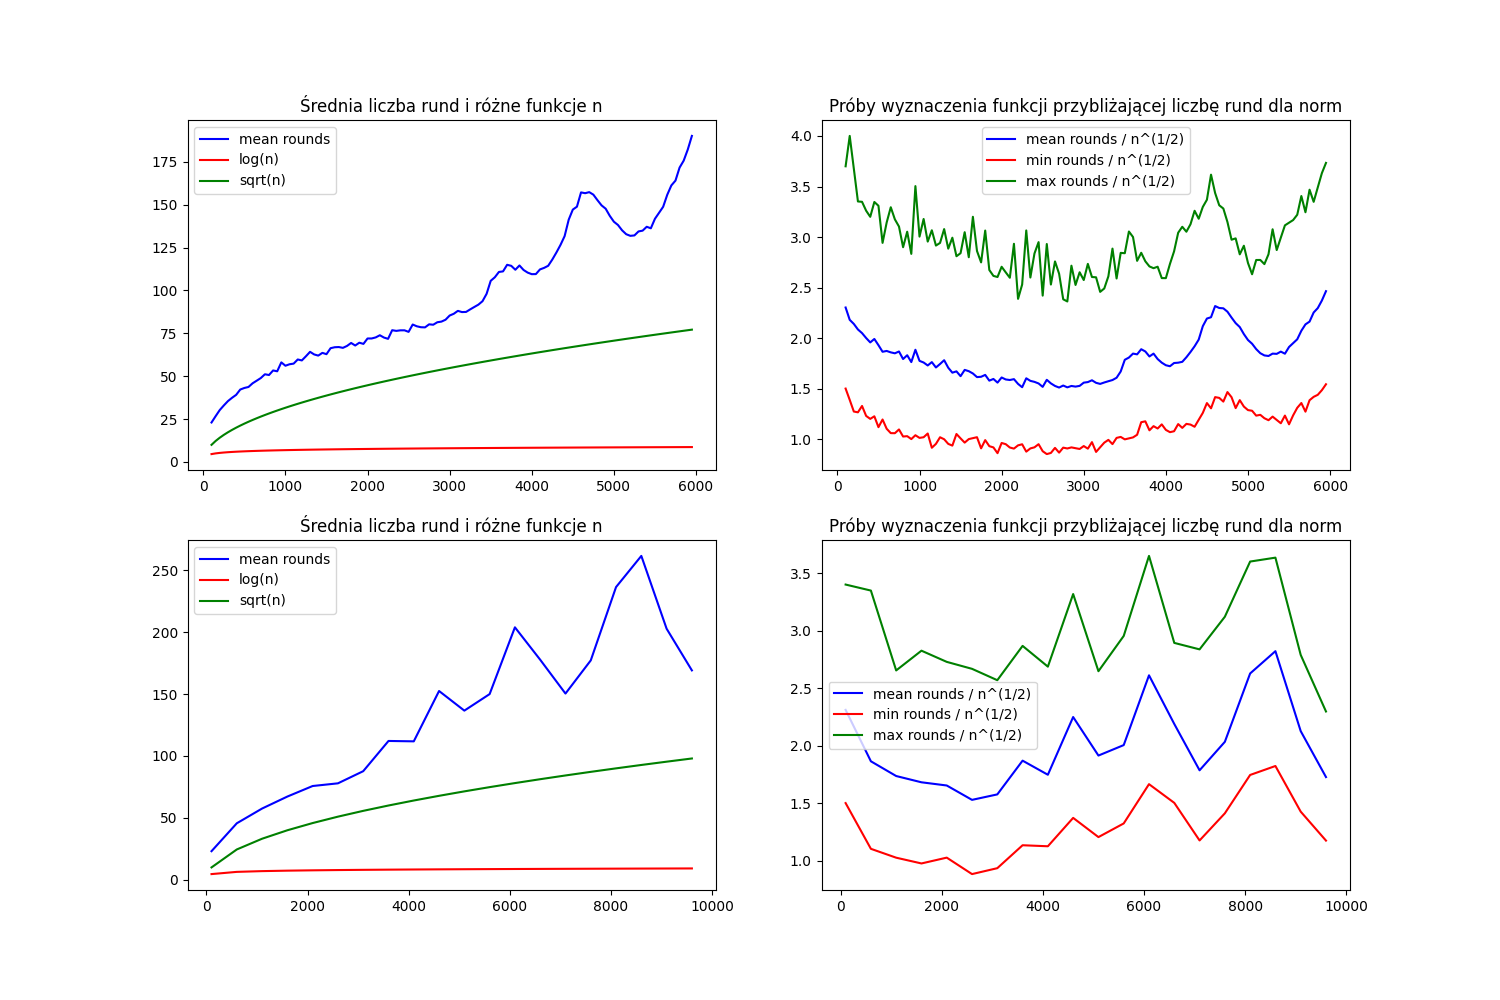

In [96]:
Ns = dfNorm.n.unique()

minRes, maxRes, meanRes, _, _, _ = extractFromColumnByN(dfNorm, "rounds", Ns)
plt.close()

factor = 2.0
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(Ns, meanRes, color = "blue", label= "mean rounds")
axs[0][0].plot(Ns, [math.log(n) for n in Ns], color = "red", label= "log(n)")
axs[0][0].plot(Ns, [math.sqrt(n) for n in Ns], color = "green", label= "sqrt(n)")
axs[0][0].legend()
axs[0][0].set_title("Średnia liczba rund i różne funkcje n")
sqrtN = [n**(1/factor) for n in Ns]
axs[0][1].plot(Ns, [x / y for x, y in zip(meanRes, sqrtN)] , color = "blue", label= "mean rounds / n^(1/2)")
axs[0][1].plot(Ns, [x / y for x, y in zip(minRes, sqrtN)] , color = "red", label= "min rounds / n^(1/2)")
axs[0][1].plot(Ns, [x / y for x, y in zip(maxRes, sqrtN)] , color = "green", label= "max rounds / n^(1/2)")
axs[0][1].set_title("Próby wyznaczenia funkcji przybliżającej liczbę rund dla norm")
axs[0][1].legend()

Ns = dfNormApprox.n.unique()
minRes, maxRes, meanRes, _, _, _ = extractFromColumnByN(dfNormApprox, "rounds", Ns)

axs[1][0].plot(Ns, meanRes, color = "blue", label= "mean rounds")
axs[1][0].plot(Ns, [math.log(n) for n in Ns], color = "red", label= "log(n)")
axs[1][0].plot(Ns, [math.sqrt(n) for n in Ns], color = "green", label= "sqrt(n)")
axs[1][0].legend()
axs[1][0].set_title("Średnia liczba rund i różne funkcje n")

sqrtN = [n**(1/factor) for n in Ns]
axs[1][1].plot(Ns, [x / y for x, y in zip(meanRes, sqrtN)] , color = "blue", label= "mean rounds / n^(1/2)")
axs[1][1].plot(Ns, [x / y for x, y in zip(minRes, sqrtN)] , color = "red", label= "min rounds / n^(1/2)")
axs[1][1].plot(Ns, [x / y for x, y in zip(maxRes, sqrtN)] , color = "green", label= "max rounds / n^(1/2)")
axs[1][1].set_title("Próby wyznaczenia funkcji przybliżającej liczbę rund dla norm")
axs[1][1].legend()
